In [1]:
!pip install --quiet climetlab

You should consider upgrading via the 'pip install --upgrade pip' command.


# Meteonet

This is an retrieve an plot various data types from https://github.com/meteofrance/meteonet

In [2]:
import climetlab as cml

## Radar images

In [3]:
ds = cml.load_dataset("meteonet-radar")

In [4]:
ds

Home page,https://meteonet.umr-cnrm.fr
Documentation,https://meteofrance.github.io/meteonet/
Citation,-
Licence,https://meteonet.umr-cnrm.fr/dataset/LICENCE.md


In [5]:
ds.licence

'https://meteonet.umr-cnrm.fr/dataset/LICENCE.md'

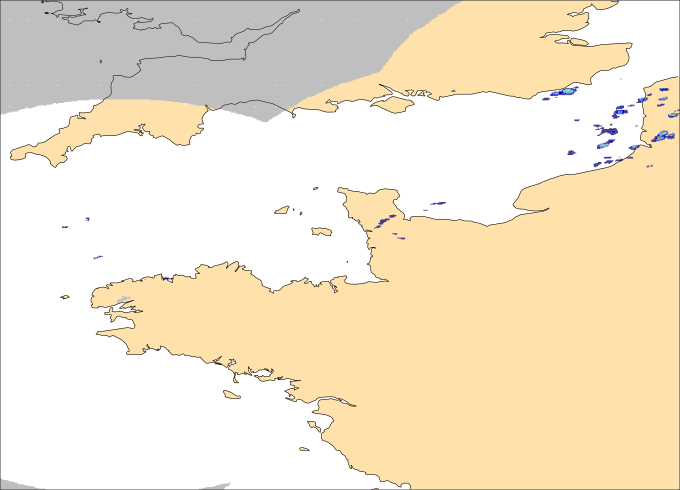

In [6]:
cml.plot_map(ds)

In [7]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:   (time: 45, x: 784, y: 565)
Coordinates:
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 776 777 778 779 780 781 782 783
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 557 558 559 560 561 562 563 564
    lon       (y, x) float64 -5.832 -5.822 -5.812 -5.802 ... 1.978 1.988 1.998
    lat       (y, x) float64 51.89 51.89 51.89 51.89 ... 46.25 46.25 46.25 46.25
  * time      (time) datetime64[ns] 2016-08-21T00:10:00 ... 2016-08-31T00:30:00
Data variables:
    rainfall  (time, y, x) int16 -1 -1 -1 -1 -1 -1 -1 -1 -1 ... 0 0 0 0 0 0 0 0

## Ground station observations

In [8]:
ds = cml.load_dataset("meteonet-ground-stations", domain='SE')

In [9]:
ds.to_pandas()

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,1027003,45.83000,5.11000,196.0,2016-01-01 00:00:00,NaN,NaN,NaN,98.0,278.75,279.05,NaN
1,1033002,46.09000,5.81000,350.0,2016-01-01 00:00:00,0.0,0.0,0.0,99.0,278.25,278.35,NaN
2,1034004,45.77000,5.69000,330.0,2016-01-01 00:00:00,0.0,0.0,0.0,100.0,279.15,279.15,NaN
3,1072001,46.20000,5.29000,260.0,2016-01-01 00:00:00,NaN,NaN,0.0,NaN,NaN,276.55,NaN
4,1089001,45.98000,5.33000,252.0,2016-01-01 00:00:00,0.0,0.0,0.0,95.0,278.85,279.55,102720.0
...,...,...,...,...,...,...,...,...,...,...,...,...
111618,84085004,43.94000,5.23000,488.0,2016-01-01 23:54:00,100.0,2.0,0.0,94.0,280.05,280.95,NaN
111619,84086001,43.81000,5.15000,672.0,2016-01-01 23:54:00,140.0,7.6,0.0,93.0,279.65,280.75,NaN
111620,84087001,44.14000,4.86000,55.0,2016-01-01 23:54:00,130.0,5.0,0.0,76.0,281.25,285.35,101760.0
111621,84107002,44.04067,5.49283,836.0,2016-01-01 23:54:00,120.0,3.8,0.2,99.0,278.55,278.65,NaN


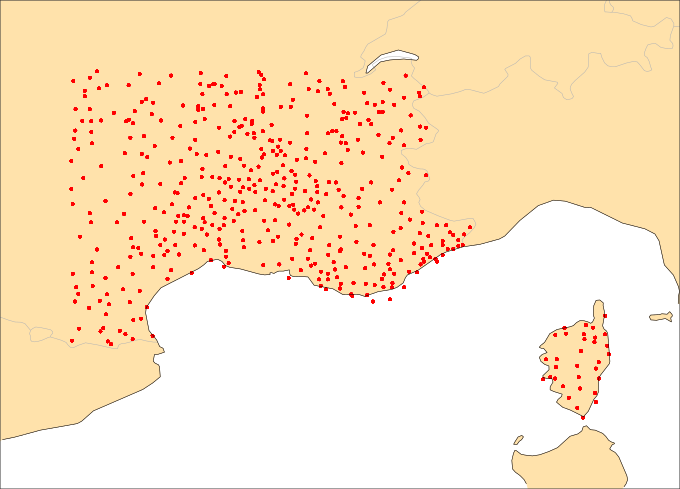

In [10]:
cml.plot_map(ds)

## Weather models

In [11]:
ds = cml.load_dataset("meteonet-weather-models", model='arome')

In [12]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:            (latitude: 227, longitude: 315, step: 25)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
    heightAboveGround  int64 ...
  * latitude           (latitude) float64 51.9 51.87 51.85 ... 46.3 46.27 46.25
  * longitude          (longitude) float64 -5.842 -5.817 -5.792 ... 1.983 2.008
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (step, latitude, longitude) float32 ...
    d2m                (step, latitude, longitude) float32 ...
    r                  (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2020-09-10T17:13:59 GRIB to CDM+CF via cfgrib-0....

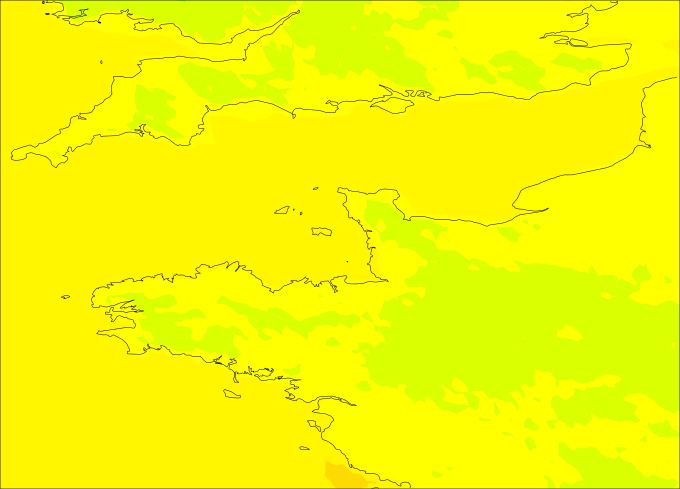

In [13]:
cml.plot_map(ds[0])

In [14]:
ds = cml.load_dataset("meteonet-weather-models", model='arpege', variable='P_sea_level')

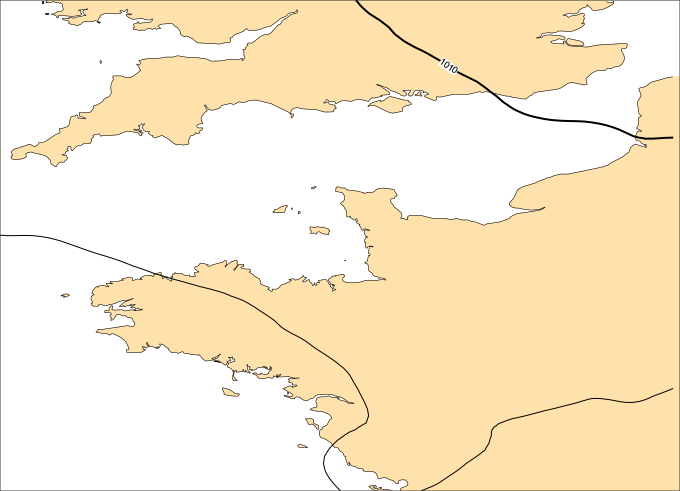

In [15]:
cml.plot_map(ds[0])

## Masks

In [16]:
ds = cml.load_dataset("meteonet-masks", domain='SE')

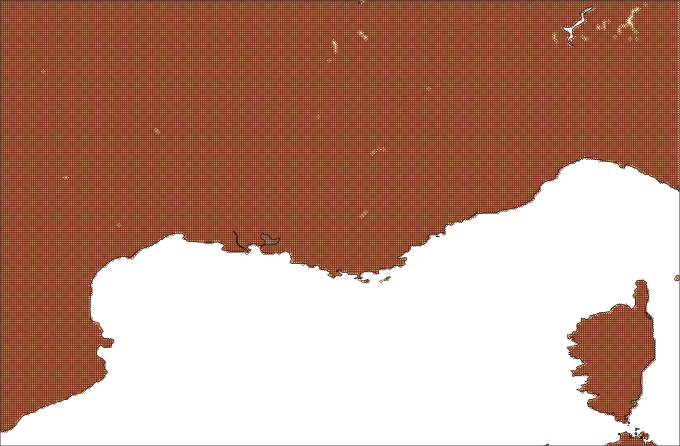

In [17]:
cml.plot_map(ds[0], style='land-sea-mask')

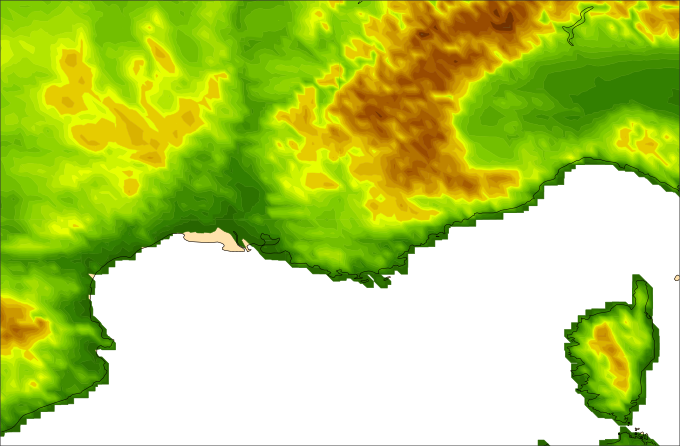

In [18]:
cml.plot_map(ds[1], style='orography')